In [1]:
library(GLMsData)
library(MASS)
data(butterfat)

In [3]:
str(butterfat)

'data.frame':	100 obs. of  3 variables:
 $ Butterfat: num  3.74 4.01 3.77 3.78 4.1 4.06 4.27 3.94 4.11 4.25 ...
 $ Breed    : Factor w/ 5 levels "Ayrshire","Canadian",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Age      : Factor w/ 2 levels "2year","Mature": 2 1 2 1 2 1 2 1 2 1 ...


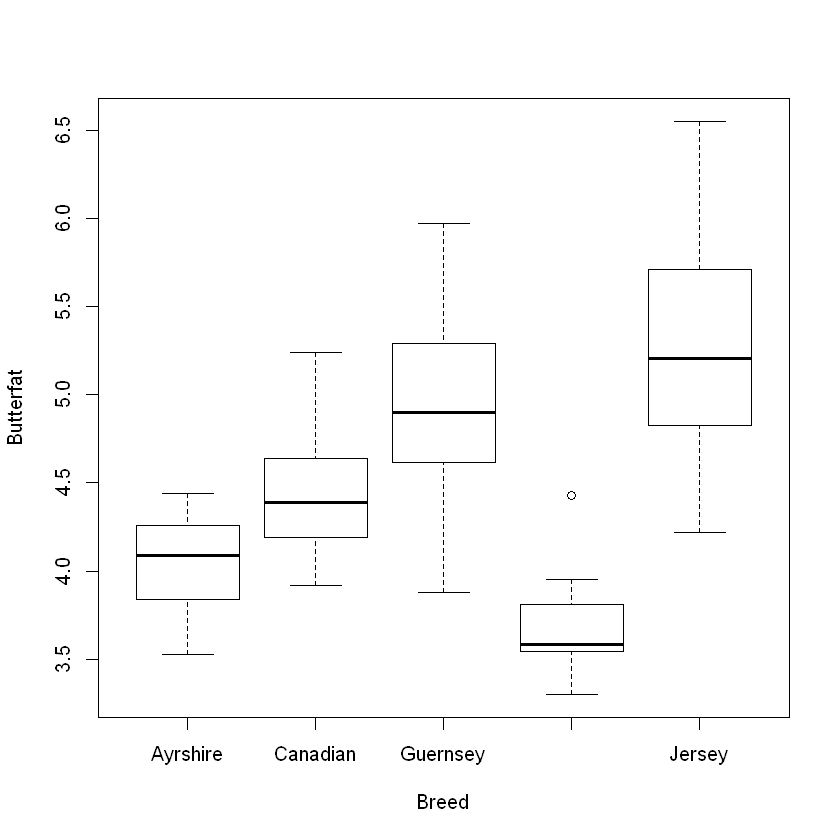

In [4]:
boxplot(Butterfat ~ Breed, data=butterfat)

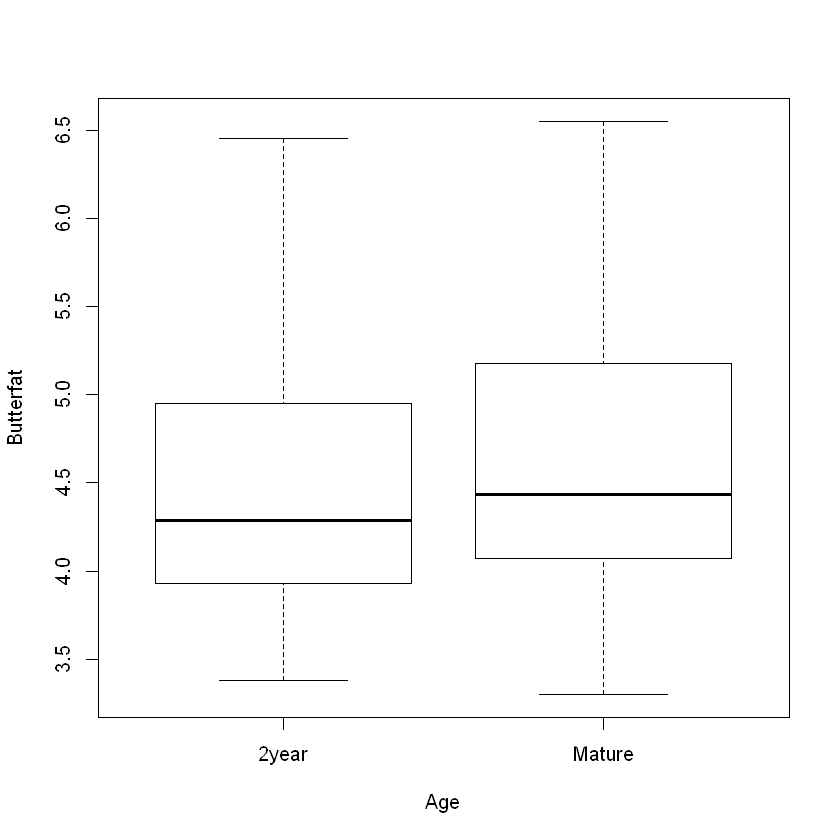

In [5]:
boxplot(Butterfat ~ Age, data=butterfat)

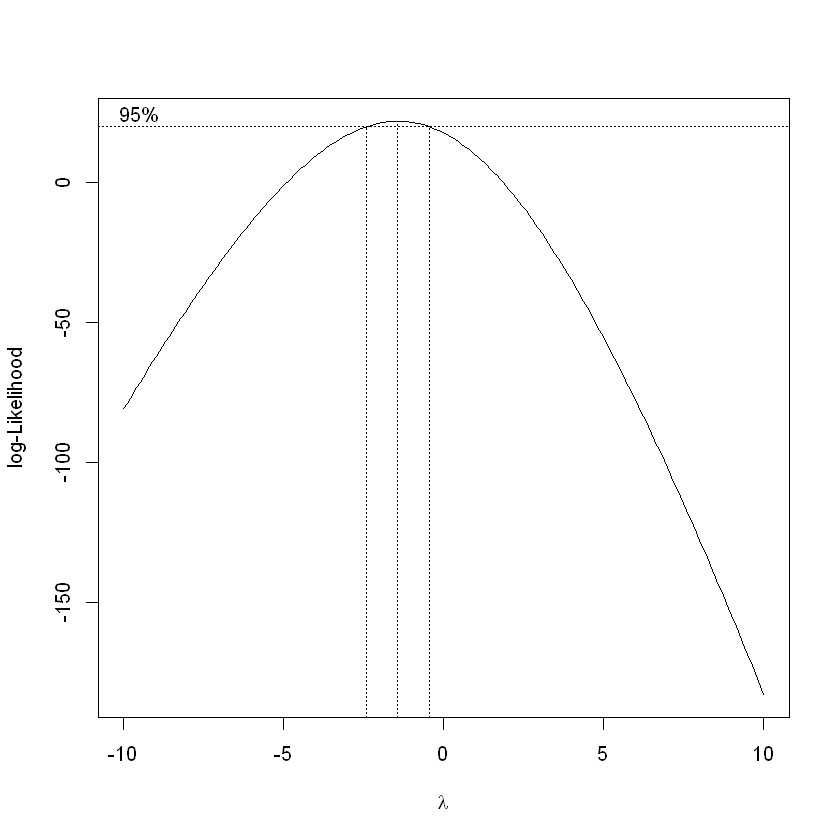

In [7]:
boxcox(Butterfat ~ factor(Breed) + factor(Age), lambda=seq(-10, 10, length=200), data=butterfat)

In [8]:
lm.1 <- lm(log(Butterfat) ~ factor(Breed) + factor(Age), data=butterfat)

In [9]:
coef(summary(lm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.38749802,0.02114433,65.620342,2.590653e-80
factor(Breed)Canadian,0.08798426,0.02729721,3.223196,1.743077e-03
factor(Breed)Guernsey,0.19564150,0.02729721,7.167088,1.711123e-10
factor(Breed)Holstein-Fresian,-0.10139038,0.02729721,-3.714313,3.456022e-04
factor(Breed)Jersey,0.26111862,0.02729721,9.565762,1.540183e-15
factor(Age)Mature,0.02338223,0.01726427,1.354371,1.788647e-01


In [10]:
anova(lm.1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
factor(Breed),4,1.70334433,0.425836083,57.148645,2.319966e-24
factor(Age),1,0.01366822,0.013668219,1.834321,1.788647e-01
Residuals,94,0.70042941,0.007451377,NA,NA


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 0.995"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 1.005"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 1.01"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 0.995"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 1.005"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 1.01"Warning message in simpleLoess(y, x, w, span

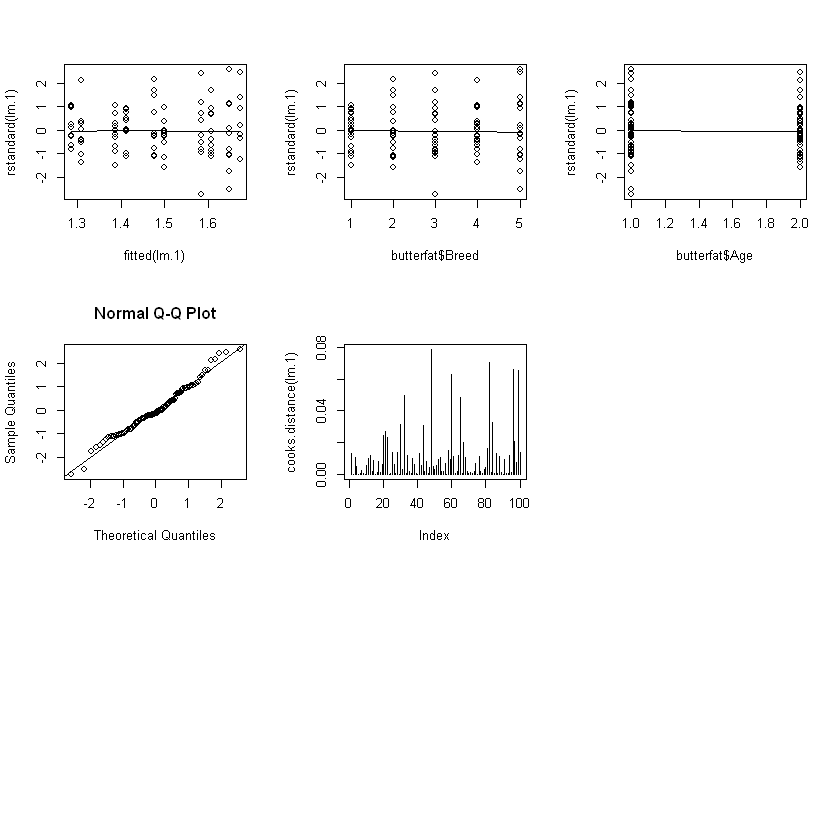

In [19]:
par(mfrow=c(3, 3))
scatter.smooth(rstandard(lm.1) ~ fitted(lm.1))
scatter.smooth(rstandard(lm.1) ~ butterfat$Breed)
scatter.smooth(rstandard(lm.1) ~ butterfat$Age)
qqnorm(rstandard(lm.1))
qqline(rstandard(lm.1))
plot(cooks.distance(lm.1), type="h")

In [16]:
rowSums(influence.measures(lm.1)$is.inf)

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   1   0